# Analysis of the State of the Business

## Loan Types Diagram

<img src="https://i.imgur.com/B7NvEKb.png">

> **Note**: Past debt delinquency rates (DQ) have determined the interest rates for the Contigo product. 
>
> The monthly DQ rates for each Contigo loan type is an estimation that holds throught this year.

## Importing Libraries and Modules

In [317]:
import numpy as np
import math
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Loan Features

In [318]:
# Contigo A loan features
contigo_a_features = {
    "loan_amt":1000,
    "loan_term":1,
    "interest_rate":0.15,
    "delinquency_rate":0.135,
    "initial_num_accounts":5000,
    "account_growth_mom":0.25,
    "op_cost_per_acct":30
}

# Contigo B loan features
contigo_b_features = {
    "loan_amt":2000,
    "loan_term":1,
    "interest_rate":0.1,
    "delinquency_rate":0.08,
    "initial_num_accounts":10000,
    "account_growth_mom":0.10,
    "op_cost_per_acct":30
}

Where:

- **loan_amt**: The loan amount in mexican pesos.
- **loan_term**: The number of months to pay the loan amount in full.
- **interest_rate**: The monthly interest rate.
- **delinquency_rate**: The monthly estimated delinquency rate throughout the year.
- **initial_num_accounts**: The number of accounts/customers for the first month.
- **account_growth_mom**: The estimated growth rate for the accounts/customers month-over-month.
- **op_cost_per_acct**: The current operative monthly cost per account in mexican pesos.

> **Task**: The startup is concerned that the change in DQ rates and the aggressive expansion may reduce
profitability in the following months, so they asked you to **make a forecast on the net income of its
operation (ignoring taxes) in the next 12 months**.

## Accounts

In [319]:
def compute_accounts(initial_accounts: int, growth_rate: float, num_months=12):
    """Computes the number of accounts during 12 months based on a specific MoM growth rate"""
    return [math.floor(initial_accounts * (1+ growth_rate) ** i) for i in range(num_months)]    

I will use **numpy** arrays for faster numerical computations and to perform element-wise arithmetic operations.

In [320]:
# Number of accounts month-over-month of Contigo A
contigo_a_accounts_mom = \
    np.array(compute_accounts(contigo_a_features["initial_num_accounts"], contigo_a_features["account_growth_mom"]))

# Number of accounts month-over-month of Contigo B
contigo_b_accounts_mom = \
    np.array(compute_accounts(contigo_b_features["initial_num_accounts"], contigo_b_features["account_growth_mom"]))

## Delinquency Accounts

In [337]:
# Number of delinquency accounts month-over-month of Contigo A
contigo_a_delinq_accts_mom = contigo_a_accounts_mom * contigo_a_features["delinquency_rate"]
# Round down every element in the array to the nearest whole number
contigo_a_delinq_accts_mom = np.floor(contigo_a_delinq_accts_mom)

# Number of delinquency accounts month-over-month of Contigo B
contigo_b_delinq_accts_mom = contigo_b_accounts_mom * contigo_b_features["delinquency_rate"]
# Round down every element in the array to the nearest whole number
contigo_b_delinq_accts_mom = np.floor(contigo_b_delinq_accts_mom)

In [338]:
contigo_a_delinq_accts_mom

array([ 675.,  843., 1054., 1318., 1647., 2059., 2574., 3218., 4023.,
       5029., 6286., 7857.])

## Interest Revenue

In [322]:
def compute_interest_rev(loan_feats: dict, loan_accounts_mom):
    """Computes the month-over-month interest revenue of a loan type"""
    interest_revenue_per_account = \
        loan_feats["loan_amt"]*loan_feats["interest_rate"]*loan_feats["loan_term"]*(1-loan_feats["delinquency_rate"])
    return loan_accounts_mom * interest_revenue_per_account

In [323]:
# Interest revenue month-over-month of Contigo A
contigo_a_interest_rev_mom = compute_interest_rev(contigo_a_features, contigo_a_accounts_mom)

# Interest revenue month-over-month of Contigo B
contigo_b_interest_rev_mom = compute_interest_rev(contigo_b_features, contigo_b_accounts_mom)

## Delinquency Losses

In [324]:
# Delinquency loss month-over-month of Contigo A
contigo_a_delinq_loss_mom = contigo_a_delinq_accts_mom * contigo_a_features["loan_amt"]

# Delinquency loss month-over-month of Contigo B
contigo_b_delinq_loss_mom = contigo_b_delinq_accts_mom * contigo_b_features["loan_amt"]

## Operative Cost

In [325]:
# Operative cost month-over-month of Contigo A
contigo_a_op_cost_mom = contigo_a_accounts_mom * contigo_a_features["op_cost_per_acct"]

# Operative cost month-over-month of Contigo B
contigo_b_op_cost_mom = contigo_b_accounts_mom * contigo_b_features["op_cost_per_acct"]

## Net Income

In [326]:
# Net income month-over-month of Contigo A
contigo_a_net_income_mom = contigo_a_interest_rev_mom - contigo_a_delinq_loss_mom - contigo_a_op_cost_mom

# Net income month-over-month of Contigo B
contigo_b_net_income_mom = contigo_b_interest_rev_mom - contigo_b_delinq_loss_mom - contigo_b_op_cost_mom

## Presenting Results in Tabular Format

In [327]:
# Maps column names to values
cols_to_values = {
    "month":np.concatenate((np.arange(1,13), np.arange(1,13))),
    "loan_type":["Contigo A"] * 12 + ["Contigo B"] * 12,
    "accounts":np.concatenate((contigo_a_accounts_mom, contigo_b_accounts_mom)),
    "delinquency_accounts":np.concatenate((contigo_a_delinq_accts_mom, contigo_b_delinq_accts_mom)),
    "interest_revenue":np.concatenate((contigo_a_interest_rev_mom, contigo_b_interest_rev_mom)),
    "delinquency_loss":np.concatenate((contigo_a_delinq_loss_mom, contigo_b_delinq_loss_mom)),
    "operative_costs":np.concatenate((contigo_a_op_cost_mom, contigo_b_op_cost_mom)),
    "net_income":np.concatenate((contigo_a_net_income_mom, contigo_b_net_income_mom))
}

# Creates a DataFrame with the results of Contigo loans
collection_results = pd.DataFrame(cols_to_values)

# Converts loan type column to a categorical data type
collection_results["loan_type"] = pd.Categorical(collection_results.loan_type)

In [328]:
collection_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   month                 24 non-null     int64   
 1   loan_type             24 non-null     category
 2   accounts              24 non-null     int64   
 3   delinquency_accounts  24 non-null     float64 
 4   interest_revenue      24 non-null     float64 
 5   delinquency_loss      24 non-null     float64 
 6   operative_costs       24 non-null     int64   
 7   net_income            24 non-null     float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 1.6 KB


In [329]:
collection_results.describe()

,month,accounts,delinquency_accounts,interest_revenue,delinquency_loss,operative_costs,net_income
count,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,6.500000,20203.041667,2237.360625,3.104712e+06,2.950161e+06,6.060912e+05,-4.515397e+05
std,3.526299,12828.091422,1836.112560,1.732283e+06,1.740885e+06,3.848427e+05,5.476101e+05
min,1.000000,5000.000000,675.000000,6.487500e+05,6.750000e+05,1.500000e+05,-2.051797e+06
25%,3.750000,11825.000000,1062.255000,1.944794e+06,1.731986e+06,3.547500e+05,-5.714642e+05
50%,6.500000,16910.000000,1603.452500,2.828632e+06,2.575828e+06,5.073000e+05,-1.737180e+05
75%,9.250000,24365.000000,2355.573750,4.042664e+06,3.835298e+06,7.309500e+05,-1.038750e+05
max,12.000000,58207.000000,7857.945000,7.552358e+06,7.857945e+06,1.746210e+06,-6.000000e+04


In [330]:
collection_results

,month,loan_type,accounts,delinquency_accounts,interest_revenue,delinquency_loss,operative_costs,net_income
0,1,Contigo A,5000,675.000,648750.00,675000.0,150000,-176250.00
1,2,Contigo A,6250,843.750,810937.50,843750.0,187500,-220312.50
2,3,Contigo A,7812,1054.620,1013607.00,1054620.0,234360,-275373.00
3,4,Contigo A,9765,1318.275,1267008.75,1318275.0,292950,-344216.25
4,5,Contigo A,12207,1647.945,1583858.25,1647945.0,366210,-430296.75
5,6,Contigo A,15258,2059.830,1979725.50,2059830.0,457740,-537844.50
6,7,Contigo A,19073,2574.855,2474721.75,2574855.0,572190,-672323.25
7,8,Contigo A,23841,3218.535,3093369.75,3218535.0,715230,-840395.25
8,9,Contigo A,29802,4023.270,3866809.50,4023270.0,894060,-1050520.50
9,10,Contigo A,37252,5029.020,4833447.00,5029020.0,1117560,-1313133.00


## Exporting Results

In [331]:
# Export results to a CSV file
collection_results.to_csv("./collection_results.csv", index=False)

# Export results to an Excel file
collection_results.to_excel("./collection_results.xlsx", index=False)

## Visualizing Results

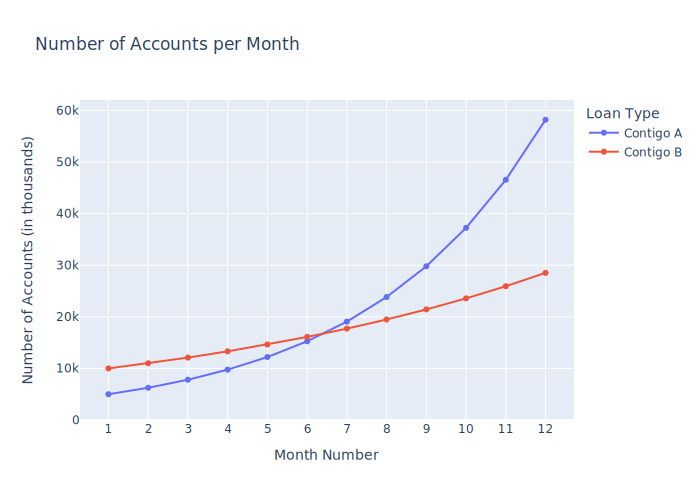

In [332]:
accts_lin_plot = px.line(collection_results,
                         x="month",
                         y="accounts",
                         color="loan_type",
                         markers=True,
                         title="Number of Accounts per Month")

# Update figure layout
accts_lin_plot.update_layout(xaxis_title="Month Number",
                             yaxis_title="Number of Accounts (in thousands)",
                             legend_title="Loan Type")

# Set y-axis to start at 0
accts_lin_plot.update_yaxes(rangemode="tozero")

# Set the steps between ticks to 1
accts_lin_plot.update_xaxes(dtick=1)

# Show figure in svg format
accts_lin_plot.show("svg")

> **Observation**: The number of accounts of Contigo A becomes higher that Contigo B after the sixth month.

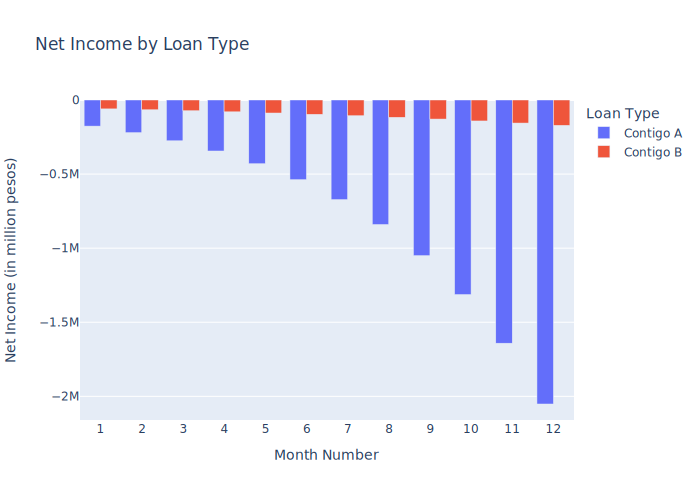

In [335]:
gross_income_barplot = px.bar(collection_results,
                               x="month",
                               y="net_income",
                               color="loan_type",
                               barmode="group",
                               title="Net Income by Loan Type")

# Update figure layout
gross_income_barplot.update_layout(xaxis_title="Month Number",
                             yaxis_title="Net Income (in million pesos)",
                             legend_title="Loan Type")

# Set the steps between ticks to 1
gross_income_barplot.update_xaxes(dtick=1)

# Show figure in svg format
gross_income_barplot.show("svg")

## Questions

> **Question 1.1**: What factors may be against the profitability of the startup?

### Factors Against Profitability

1. Given that delinquency rates determine the interest rate of Contigo's products, if **delinquency rates are higher than interest rates** the startup would have a **negative gross margin** due to a lower amount of interests collected every month. This scenario would lead to a decrease in the profitability.

2. An **increase in operating costs per account** could also decrease the profitability of the startup. Some examples are: 
    - Spending too much on collection efforts: Using unnecesarry or expensive communication channels with customers.
    
    - A higher inflation that leads an increase in the prices of the software that is required to maintain the software for account management.

3. An **increase in the reference rate by the Central Bank** could increase the probability of more customers not paying on time, raising delinquency rates of Contigo's products. If the the reference rate raise is significant or happens too fast, delinquency rates could grow at a higher pace than the interest rates of Contigo's products.

> **Question 1.2**: What should we look at in an analysis of the net income for the following months?

1. At first hand, the startup should never allow to have lower interest rates for products that are riskier. 

2. They should also track the growth rates of delinquency and interest rates, trying to keep a lower growth in delinquency rates than interest rates. 

3. Last but not least, the startup should focus on a strategy to diversify the income, to relative frequency of interest income.

> **Question 2**: Is this startup going to be profitable during the next 12 months? What are the major trends driving
changes in net income? 
>
>> **Suggestion**: Provide a model for net income and forecast it for the next 12 months. 
>>
>> **Hint**: Losses come from the total debt not being repaid, and revenue comes from collected interest. We will only consider operation costs as expenses.

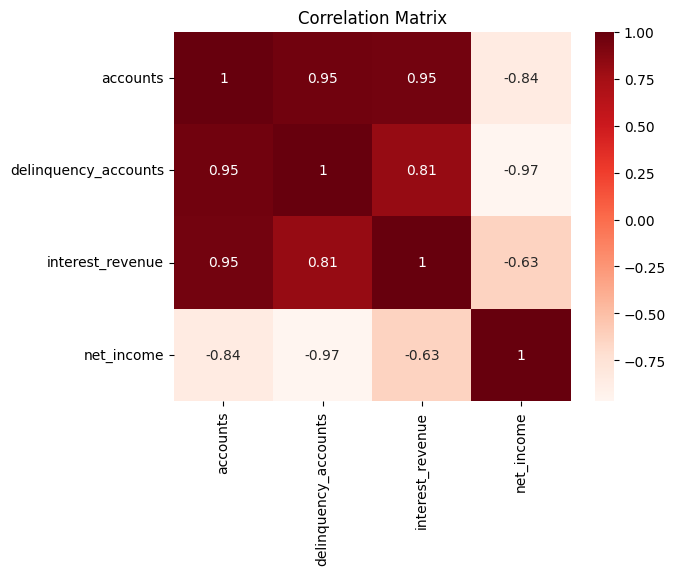

In [334]:
sns.heatmap(
    collection_results[
        ["accounts","delinquency_accounts","interest_revenue","net_income"]].corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix");

> **Question 3**: What changes are required to sustain the business not only throughout the year but in the long run?
>
> Build a proposal of changes to main startup KPIs to achieve this goal. Discuss what difficulties the startup may find in applying your recommendation.